In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Pre_processed_data.csv')
data.tail(4)

,Unnamed: 0,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,...,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Dates,Time,Boot_Time
4221,4221,4,271.31,121769.55,29.0,4,3502143,0,28397577,0.00,...,65859929,41172,386740,0,0,2,0,2019-07-16,19:12:01,8.31
4222,4222,4,271.80,122008.94,23.3,4,3513859,0,28406052,0.00,...,65965912,41271,387453,0,0,2,0,2019-07-16,19:13:02,8.32
4223,4223,4,272.11,122244.62,25.8,4,3521274,0,28412149,0.00,...,66028574,41313,387914,0,0,2,0,2019-07-16,19:14:01,8.33
4224,4224,4,279.90,122468.27,28.1,4,3559645,0,29596034,0.13,...,66086888,41510,388364,0,0,2,0,2019-07-16,19:15:01,8.34


In [3]:
data.drop(columns=['Unnamed: 0', 'Time', 'Dates'], inplace=True)

In [4]:
X = np.array(data)

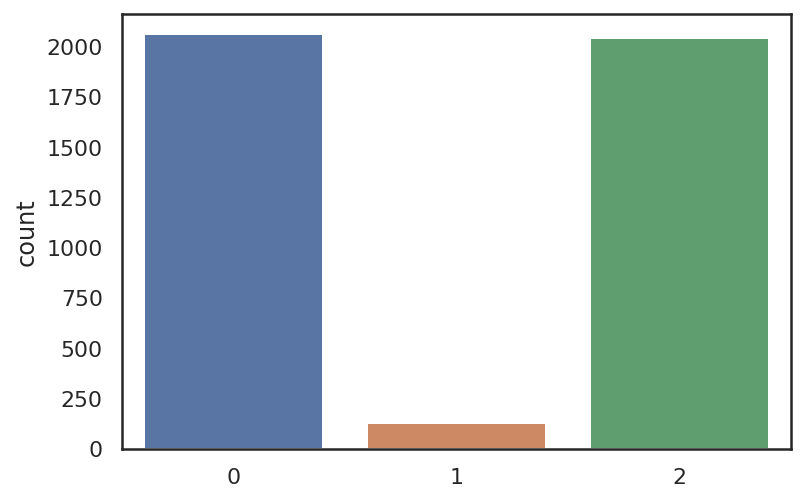

In [5]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
data['y'] = y_kmeans

sb.countplot(x=y_kmeans, data=data)

In [6]:
X = data.drop(columns='y')
y = data['y']

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_sm, y_sm = smote.fit_sample(X, y)

In [8]:
X.shape, X_sm.shape, y_sm.shape

((4225, 39), (6177, 39), (6177,))

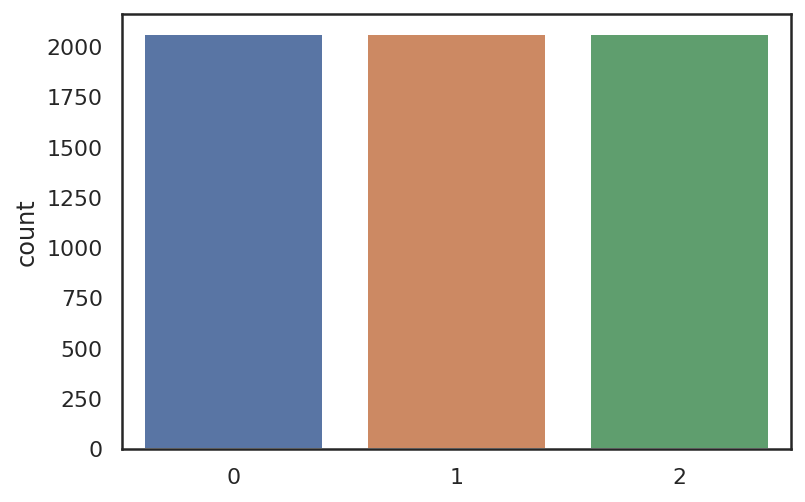

In [9]:
features = data.drop(columns='y')

new_data = pd.DataFrame(X_sm, columns=features.columns)
new_data['y_sm'] = y_sm

sb.countplot(x=y_sm, data = new_data)

In [10]:
new_data.shape

(6177, 40)

In [11]:
new_data.head()

,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,cpu avg load over 5 min,...,number of bytes sent,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Boot_Time,y_sm
0,4.0,3733.17,120971.88,31.8,4.0,20838767.0,0.0,200273168.0,0.14,0.33,...,90269129.0,140071937.0,239706.0,432121.0,0.0,1.0,3.0,0.0,8.53,0
1,4.0,3767.15,121920.71,33.3,4.0,21030713.0,0.0,202313416.0,0.80,0.39,...,90398424.0,140425748.0,240251.0,433093.0,0.0,1.0,3.0,0.0,8.57,0
2,4.0,3769.52,121938.45,23.8,4.0,21038802.0,0.0,202404974.0,0.73,0.39,...,90403041.0,140430950.0,240269.0,433117.0,0.0,1.0,3.0,0.0,8.57,0
3,4.0,3773.42,121984.77,25.0,4.0,21054241.0,0.0,202500215.0,0.69,0.39,...,90409865.0,140438873.0,240294.0,433158.0,0.0,1.0,3.0,0.0,8.58,0
4,4.0,3778.91,122102.01,25.0,4.0,21078850.0,0.0,202692540.0,0.47,0.37,...,90423946.0,140451107.0,240349.0,433242.0,0.0,1.0,3.0,0.0,8.58,0


In [12]:
z = []
o = []
t = []
for i in range(len(new_data)):
    if new_data['y_sm'][i] == 0:
        z.append(i)
    elif new_data['y_sm'][i] == 1:
        o.append(i)
    else :
        t.append(i)

In [13]:
new_data.shape

(6177, 40)

In [14]:
new_data.nunique()

Cpu Count                                                 1
Cpu Working Time                                       6037
Cpu idle Time                                          6176
cpu_percent                                            1872
Usage Cpu Count                                           1
number of software interrupts since boot               6177
number of system calls since boot                         1
number of interrupts since boot                        6177
cpu avg load over 1 min                                2081
cpu avg load over 5 min                                2061
cpu avg load over 15 min                               2024
system_total_memory                                     526
system_used_memory                                     5733
system_free_memory                                     5998
system_active_memory                                   6010
system_inactive_memory                                 3976
system_buffers_memory                   

In [15]:
new_data.drop(columns=['total number of outgoing packets which were dropped'
                      ,'total number of errors while receiving', 'number of system calls since boot'
                      , 'Usage Cpu Count ', 'Cpu Count'
                       ,'total number of outgoing packets which were dropped', 'disk_total_memory'], inplace=True)

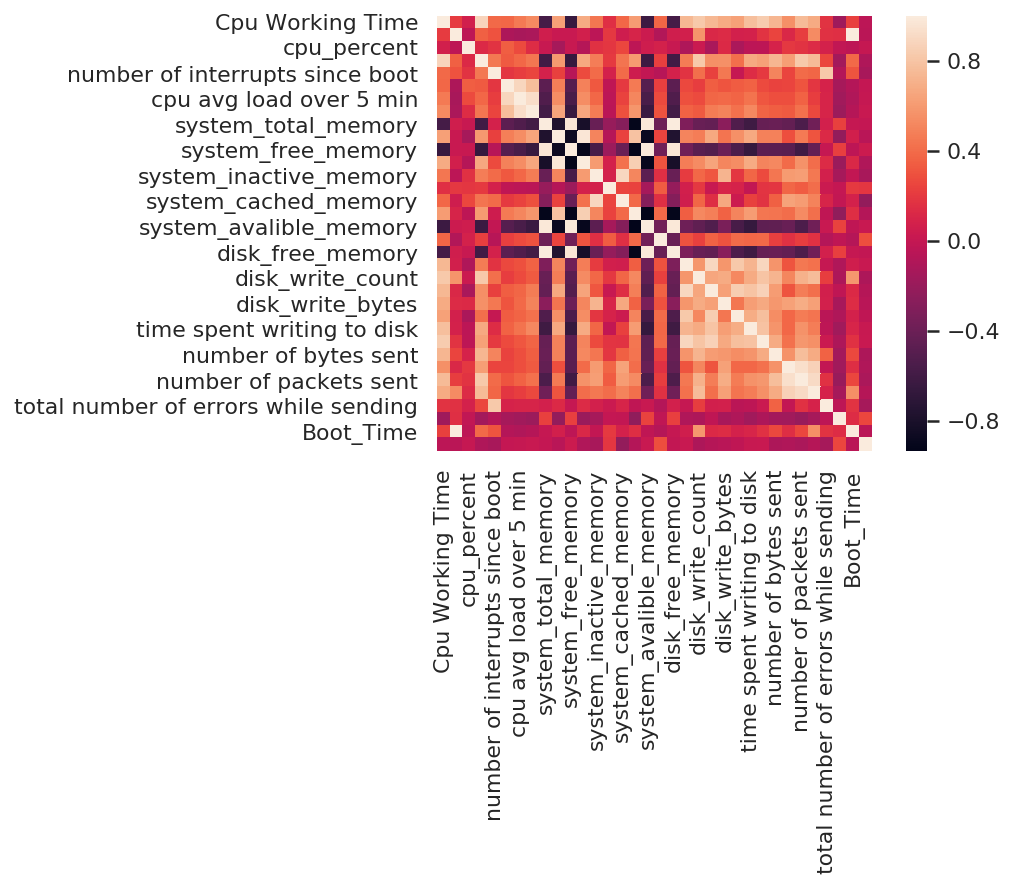

In [16]:
cor = new_data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

- 0 ==> Low
- 1 ==> Medium
- 2 ==> High

In [17]:
X = new_data.drop(columns='y_sm')
y = new_data['y_sm']

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
X_train.shape

(4632, 2)

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

a = precision_score(y_pred, y_test, average=None)
accuracy = accuracy_score(y_pred, y_test)
cm, accuracy

(array([[528,   0,   0],
        [  0, 521,   0],
        [  0,   0, 496]]), 1.0)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_pred, y_test)
cm, accuracy

(array([[528,   0,   0],
        [  0, 521,   0],
        [ 16,   0, 480]]), 0.9896440129449838)

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_pred, y_test)
cm, accuracy

(array([[528,   0,   0],
        [  0, 521,   0],
        [  0,   0, 496]]), 1.0)

In [23]:
new_data['Cpu idle Time'].min(), new_data['Cpu idle Time'].max()

(315.84, 181369.92)

In [24]:
new_data['Cpu Working Time'].min(), new_data['Cpu Working Time'].max()

(25.15, 68373.23)

In [26]:
cluster_0 = new_data[new_data['y_sm'] == 0]
cluster_1 = new_data[new_data['y_sm'] == 1]
cluster_2 = new_data[new_data['y_sm'] == 2]

In [28]:
for i in new_data.columns:
    print(i)
    print(cluster_0[i].min() , "-" , cluster_0[i].max())
    print(' ')
    print(cluster_1[i].min(), "-" ,cluster_1[i].max())
    print(' ')
    print(cluster_2[i].min(), "-" ,cluster_2[i].max())
    print(' ')
#     print(cluster_3[i].min(), "-" ,cluster_3[i].max())
#     print(' ')
#     print(cluster_4[i].min(), "-" ,cluster_4[i].max())
    print(' ')

Cpu Working Time
31.9 - 5256.22
 
70.13 - 8420.31
 
25.15 - 68373.23
 
 
Cpu idle Time
315.84 - 181369.92
 
761.51 - 141100.47
 
368.78 - 163057.12
 
 
cpu_percent
16.0 - 100.0
 
3.6 - 100.0
 
20.7 - 96.9
 
 
number of software interrupts since boot
281247.0 - 28027163.0
 
444709.0 - 47071495.0
 
158614.0 - 133174727.0
 
 
number of interrupts since boot
903887.0 - 232942868.0
 
370030.0 - 80028379.0
 
764607.0 - 247719677.0
 
 
cpu avg load over 1 min
0.0 - 4.54
 
0.0 - 3.25
 
0.0 - 3.96
 
 
cpu avg load over 5 min
0.0 - 1.65
 
0.0 - 2.47
 
0.0 - 3.12
 
 
cpu avg load over 15 min
0.0 - 0.83
 
0.0 - 2.3
 
0.0 - 1.93
 
 
system_total_memory
16776867840.0 - 16776884224.0
 
8182292480.0 - 8284880896.0
 
16683192320.0 - 16776884224.0
 
 
system_used_memory
1154301952.0 - 6781157376.0
 
1400451072.0 - 7457054720.0
 
643899392.0 - 9895251968.0
 
 
system_free_memory
9446146048.0 - 14459940864.0
 
122146816.0 - 5348589568.0
 
3495211008.0 - 14733697024.0
 
 
system_active_memory
1413316608.0 

In [29]:
new_data.head()

,Cpu Working Time,Cpu idle Time,cpu_percent,number of software interrupts since boot,number of interrupts since boot,cpu avg load over 1 min,cpu avg load over 5 min,cpu avg load over 15 min,system_total_memory,system_used_memory,...,time spent writing to disk,time spent doing actual I/Os,number of bytes sent,number of bytes received,number of packets sent,number of packets recived,total number of errors while sending,total number of incoming packets which were dropped,Boot_Time,y_sm
0,3733.17,120971.88,31.8,20838767.0,200273168.0,0.14,0.33,0.43,1.677688e+10,6.781157e+09,...,2323096.0,524028.0,90269129.0,140071937.0,239706.0,432121.0,1.0,3.0,8.53,0
1,3767.15,121920.71,33.3,21030713.0,202313416.0,0.80,0.39,0.42,1.677688e+10,6.744269e+09,...,2331848.0,527724.0,90398424.0,140425748.0,240251.0,433093.0,1.0,3.0,8.57,0
2,3769.52,121938.45,23.8,21038802.0,202404974.0,0.73,0.39,0.42,1.677688e+10,6.746046e+09,...,2331872.0,527748.0,90403041.0,140430950.0,240269.0,433117.0,1.0,3.0,8.57,0
3,3773.42,121984.77,25.0,21054241.0,202500215.0,0.69,0.39,0.42,1.677688e+10,6.745641e+09,...,2331916.0,527792.0,90409865.0,140438873.0,240294.0,433158.0,1.0,3.0,8.58,0
4,3778.91,122102.01,25.0,21078850.0,202692540.0,0.47,0.37,0.41,1.677688e+10,6.754492e+09,...,2332252.0,528036.0,90423946.0,140451107.0,240349.0,433242.0,1.0,3.0,8.58,0


In [32]:
np.arange(1.0, 10.0)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [37]:
import random
random.randrange(1.0,101.0)

84

In [40]:
# random.uniform(1, 12)

6.37250730684744